In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## MNIST Dataset

In [2]:
df = pd.read_csv('./train.csv')
data = df.values
print(data.shape)

(42000, 785)


In [3]:
x = data[:,1:]
y = data[:,0]

print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [4]:
def drawImg(x):
    img = x.reshape((28,28))
    plt.imshow(img,cmap='gray')

In [5]:
split = int(0.8 *x.shape[0])
x_train = x[:split,:]
y_train = y[:split]

x_test = x[split:,:]
y_test = y[split:]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


## K-Nearest Neighbours

In [6]:
def dist(x1,x2):
    return np.sqrt(((x2-x1)**2).sum())
    
def knn(x_train,y_train,query_x,k=5):
    #First Step
    dist_vals = []
    
    m = x_train.shape[0]
    for ix in range(m):
        d = dist(query_x,x_train[ix])
        dist_vals.append((d,y_train[ix]))
        
    dist_vals = sorted(dist_vals)
    dist_vals = dist_vals[:k]
    
    y = np.array(dist_vals)
    t = np.unique(y[:,1],return_counts=True)
    index = t[1].argmax()
    prediction  = t[0][index]
    return prediction
    

In [7]:
query_x = x_test[0]
pred = knn(x_train,y_train,query_x)

0
0


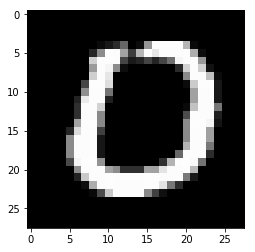

In [8]:
print(int(pred))
drawImg(query_x)
print(y_test[0])

In [10]:
# Testing
cnt = 0
for i in range(100):
    pred = knn(x_train,y_train,x_test[i])
    if(int(pred)==y_test[i]):
        cnt +=1
        
print(cnt/100)

0.96
